# TensorFlow Tutorial By: Ali Magdi 24/1/2025

# Import used libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from imutils import paths
import random
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import tensorflow.keras as k
import tensorflow as tf


Import TF

In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))


Num GPUs Available:  1


# Tensors

In [ ]:
# 1-rank tensor
rank_1_tensor = tf.constant([1,2,3])
print(rank_1_tensor)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [ ]:
# 2-rank tensor
rank_2_tensor = tf.constant([[1,2,3],[4,5,6]])
print(rank_2_tensor)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [ ]:
# 3-rank tensor
rank_3_tensor = tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(rank_3_tensor)

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]], shape=(2, 2, 3), dtype=int32)


# Some operations on the tensors

In [ ]:
F = tf.constant([[2,0], [1,4]])
G = tf.constant([[4,4,- 3], [0,-1,-2]])
H = tf.constant([[3,-1], [-2,2]])
d = tf.matmul(F,G)
tf.transpose(H-F)
tf.print(d)

[[8 8 -6]
 [4 0 -11]]


# Fetching the data

In [ ]:
imgpaths = list(paths.list_images("/content/drive/MyDrive/animal_database"))
print(imgpaths)

['/content/drive/MyDrive/animal_database/horse/test/6261.jpg', '/content/drive/MyDrive/animal_database/horse/test/6260.jpg', '/content/drive/MyDrive/animal_database/horse/train/6203.jpg', '/content/drive/MyDrive/animal_database/horse/train/6201.jpg', '/content/drive/MyDrive/animal_database/horse/train/6200.jpg', '/content/drive/MyDrive/animal_database/horse/train/6202.jpg', '/content/drive/MyDrive/animal_database/skunk/train/9_2.jpg', '/content/drive/MyDrive/animal_database/skunk/train/9_1.jpg', '/content/drive/MyDrive/animal_database/skunk/train/9_4.jpg', '/content/drive/MyDrive/animal_database/skunk/train/9_3.jpg', '/content/drive/MyDrive/animal_database/skunk/test/9_42.jpg', '/content/drive/MyDrive/animal_database/skunk/test/9_51.jpg', '/content/drive/MyDrive/animal_database/kangaroo/test/5_56.jpg', '/content/drive/MyDrive/animal_database/kangaroo/test/5_55.jpg', '/content/drive/MyDrive/animal_database/kangaroo/train/5_2.jpg', '/content/drive/MyDrive/animal_database/kangaroo/train/5

In [ ]:
unique = []
for i in imgpaths:
  unique.append(i.split("/")[5])
list(set(unique))

['cow',
 'bear',
 'deer',
 'lion',
 'sheep',
 'panda',
 'skunk',
 'horse',
 'tiger',
 'penquin',
 'gorilla',
 'coyote',
 'elephant',
 'cougar',
 'giraffe',
 'zebra',
 'goat',
 'kangaroo',
 'leopard']

In [ ]:
def get_classes(path):
  classes = []
  for i in os.listdir(path):
    classes.append(i)
  return classes

def prep_data(imgpaths, labels):
  X_train = []
  X_test = []
  Y_train = []
  Y_test = []
  for i in imgpaths:
    img = cv2.imread(i)
    if i.split("/")[-2] == "train":
      Y_train.append(labels.index(i.split("/")[5]))
      X_train.append(img)

    else:
      X_test.append(img)
      Y_test.append(labels.index(i.split("/")[5]))

  return X_train, X_test, Y_train, Y_test

In [ ]:
labels = get_classes("/content/drive/MyDrive/animal_database")
imgpaths = list(paths.list_images("/content/drive/MyDrive/animal_database"))
random.shuffle(imgpaths)
X_train, X_test, Y_train, Y_test = prep_data(imgpaths, labels)

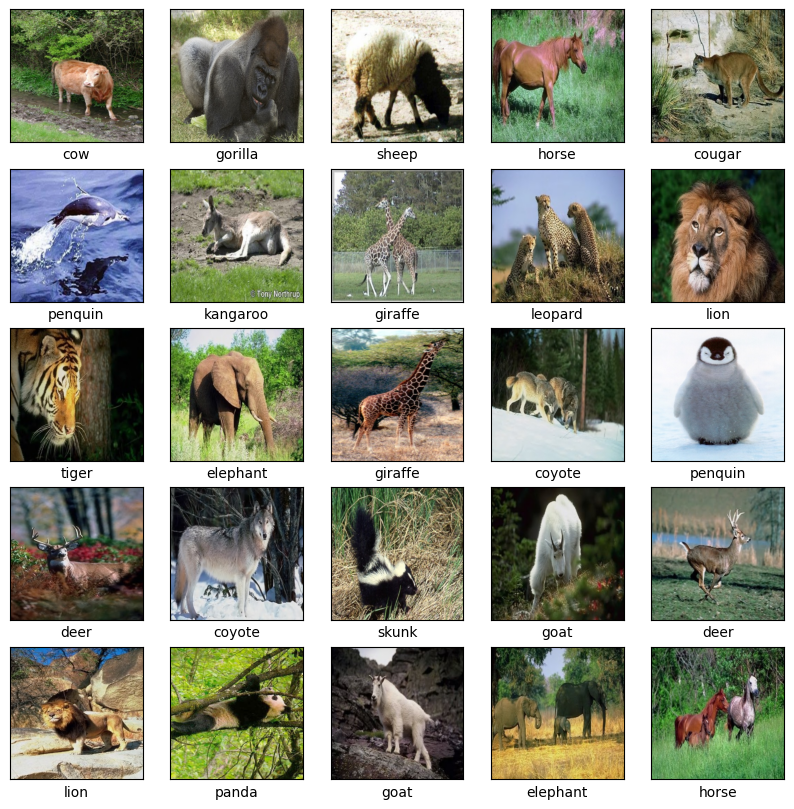

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  X_train[i] = cv2.resize(X_train[i], (256, 256))
  X_train[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)

  plt.imshow(X_train[i])
  plt.xlabel(labels[Y_train[i]])

# Fetching the data(another representation of data)

In [ ]:
imgpaths = list(paths.list_images("/content/drive/MyDrive/raw_images"))
print(imgpaths)

['/content/drive/MyDrive/raw_images/9_img_1553496607445.jpg', '/content/drive/MyDrive/raw_images/3_img_1553496516207.jpg', '/content/drive/MyDrive/raw_images/2_img_1553496464774.jpg', '/content/drive/MyDrive/raw_images/6_img_1553496592258.jpg', '/content/drive/MyDrive/raw_images/3_img_1553496518957.jpg', '/content/drive/MyDrive/raw_images/2_img_1553496461098.jpg', '/content/drive/MyDrive/raw_images/1_img_1553496500716.jpg', '/content/drive/MyDrive/raw_images/4_img_1553496528482.jpg', '/content/drive/MyDrive/raw_images/6_img_1553496556619.jpg', '/content/drive/MyDrive/raw_images/8_img_1553496671912.jpg', '/content/drive/MyDrive/raw_images/7_img_1553496755947.jpg', '/content/drive/MyDrive/raw_images/9_img_1553496606789.jpg', '/content/drive/MyDrive/raw_images/2_img_1553496460320.jpg', '/content/drive/MyDrive/raw_images/6_img_1553496591673.jpg', '/content/drive/MyDrive/raw_images/8_img_1553496674566.jpg', '/content/drive/MyDrive/raw_images/5_img_1553496608529.jpg', '/content/drive/MyDrive

In [ ]:
imgpaths[0].split("/")[-1].split("_")[0]

'9'

In [ ]:
images = []
labels = []
def data_prep2(imgpaths):
  for i in imgpaths:
    img = cv2.imread(i)
    images.append(img)
    labels.append(i.split("/")[-1].split("_")[0])

  return images, labels


In [ ]:
imgpaths = list(paths.list_images("/content/drive/MyDrive/raw_images"))
random.shuffle(imgpaths)
images, labels = data_prep2(imgpaths)

x_train, x_test, y_train,  y_test = train_test_split(images, labels, test_size = 0.2, random_state= 42)


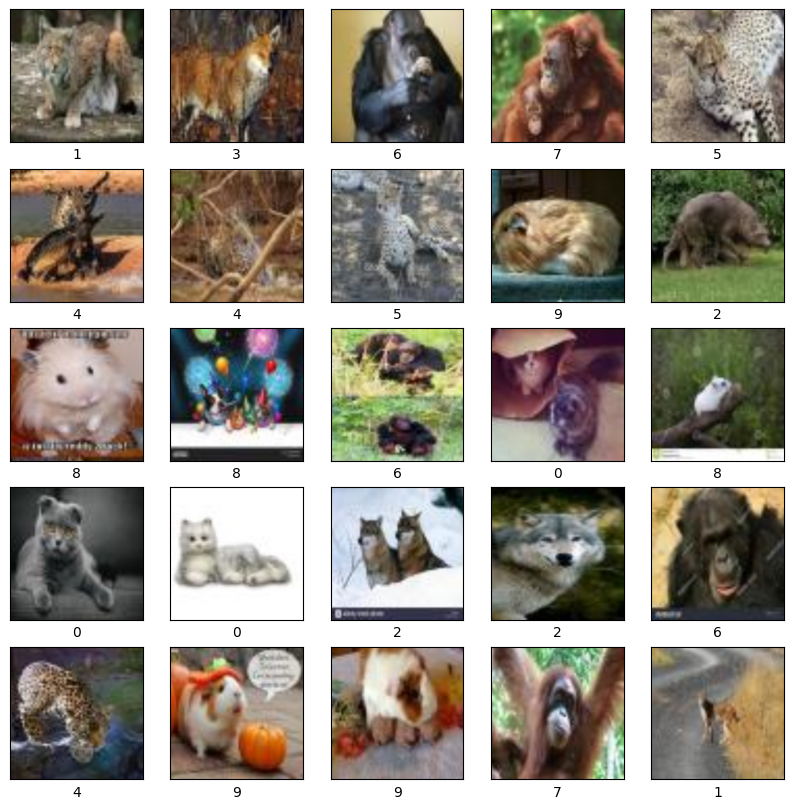

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  images[i] = cv2.resize(images[i], (256, 256))
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

  plt.imshow(images[i])
  plt.xlabel(labels[i])

# Synthetic dataset (Augmentation)

Image augmentation involves applying transformations like rotation, flipping, scaling, and noise injection to images, creating diverse variations to expand the dataset. This improves model robustness, prevents overfitting, and enhances generalization for computer vision tasks.



---

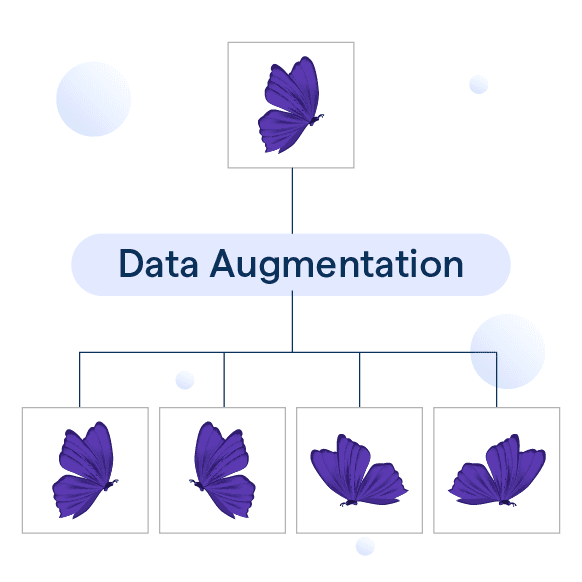



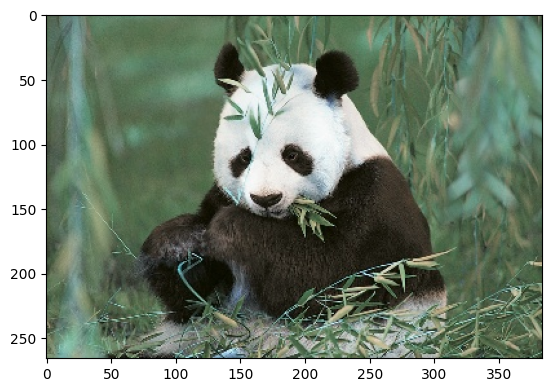

In [ ]:
imgforsyn = cv2.imread("/content/drive/MyDrive/animal_database/panda/train/6_4.jpg")
plt.imshow(imgforsyn)

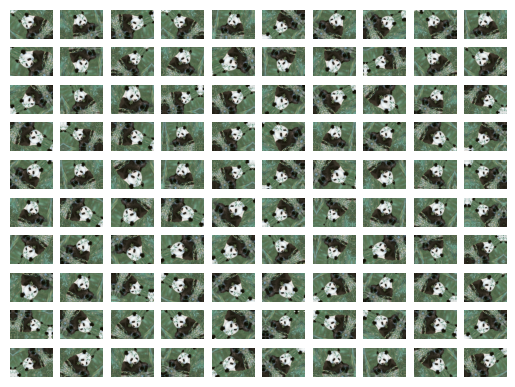

In [ ]:
data_augmentation = k.Sequential(
  [
    k.layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images
    k.layers.RandomRotation(0.2),                    # Randomly rotate images by 20%
    k.layers.RandomZoom(0.2)                         # Randomly zoom images
  ]
)

for i in range(100): #gen 100 imgs
  plt.subplot(10,10,i+1)
  plt.imshow(tf.expand_dims(data_augmentation(imgforsyn),0)[0]/255)
  plt.axis(False)

# Build a CNN Model

A Convolutional Neural Network (CNN) is a deep learning model specifically designed for processing structured data like images. CNNs are particularly effective at automatically learning spatial hierarchies of features from input data.


---


Architecture Overview:
Input Layer: Receives raw data (e.g., image pixels).

Convolutional + Activation Layers: Extract features from the input.

Pooling Layers: Reduce dimensionality.

Flattening: Converts the 2D data into a 1D vector.

Fully Connected Layers: Perform high-level reasoning and predictions.

Output Layer: Produces the final result.





---


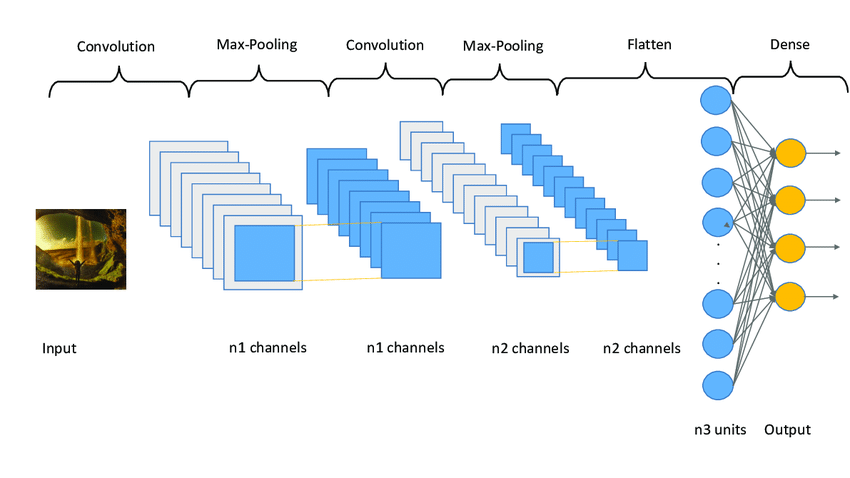

In [ ]:
(X_train, Y_train), (X_test, Y_test) = k.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
print(X_train.shape) # 50000 images
print(Y_train.shape) # 50000 label
print(X_test.shape) # 10000 images
print(Y_test.shape) # 10000 label

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
labels = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def display(X_data, Y_data, size, labels):
  plt.figure(figsize= (10, 10))
  for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    img = cv2.resize(X_data[i], (size, size))
    plt.imshow(img)
    plt.xlabel(labels[Y_data[i][0]])


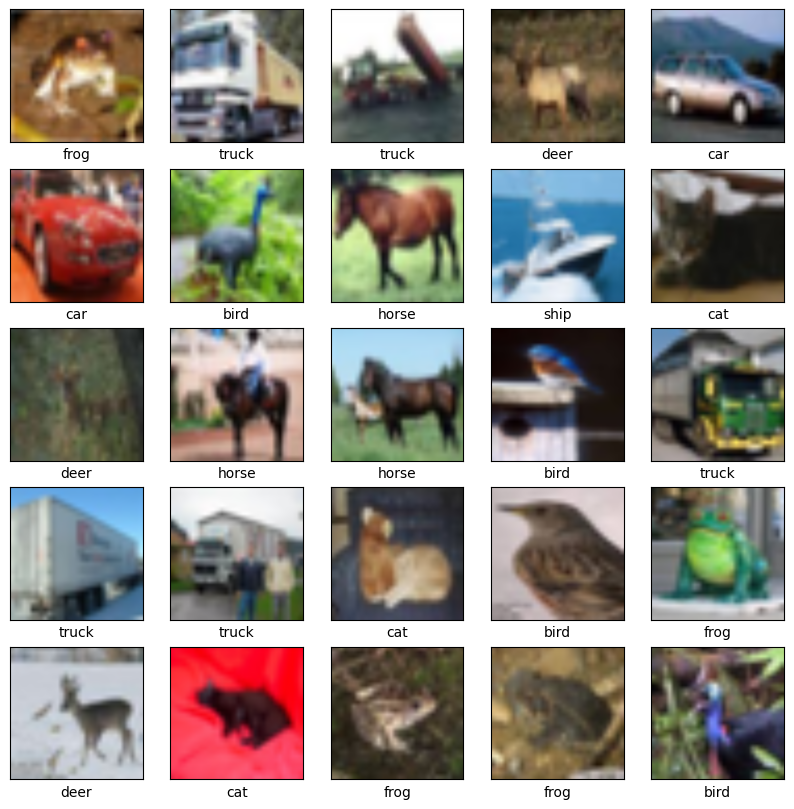

In [ ]:
display(X_train, Y_train, 256, labels)

In [ ]:
def create_CNN_model():
  model = k.models.Sequential()
  model.add(k.layers.Conv2D(32, (3, 3), activation= "relu", input_shape = (32, 32, 3)))
  model.add(k.layers.AveragePooling2D((2,2)))
  model.add(k.layers.Conv2D(64, (3, 3), activation= "relu", input_shape = (32, 32, 3)))
  model.add(k.layers.Dropout(0.2))
  model.add(k.layers.AveragePooling2D((2,2)))
  model.add(k.layers.Conv2D(64, (3, 3), activation= "relu", input_shape = (32, 32, 3)))
  model.add(k.layers.Dropout(0.2))

  model.add(k.layers.Flatten())
  model.add(k.layers.Dense(64, activation="relu"))
  model.add(k.layers.Dense(10))

  return model

In [ ]:
myModel = create_CNN_model()
myModel.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_17                 │ (None, 15, 15, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_18                 │ (None, 6, 6, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
myModel = create_CNN_model()
myModel.compile(optimizer="adam", loss = k.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ["accuracy"])

modelrun = myModel.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 60ms/step - accuracy: 0.2807 - loss: 2.2889 - val_accuracy: 0.5125 - val_loss: 1.3476
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 54ms/step - accuracy: 0.5031 - loss: 1.3695 - val_accuracy: 0.5349 - val_loss: 1.3161
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 54ms/step - accuracy: 0.5814 - loss: 1.1822 - val_accuracy: 0.6368 - val_loss: 1.0516
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.6248 - loss: 1.0748 - val_accuracy: 0.6539 - val_loss: 1.0043
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 57ms/step - accuracy: 0.6533 - loss: 1.0072 - val_accuracy: 0.6510 - val_loss: 1.0180
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 53ms/step - accuracy: 0.6748 - loss: 0.9352 - val_accuracy: 0.6769 - val_loss: 0.9464
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6922 - loss: 0.8876 - val_accuracy: 0.6862 - val_loss: 0.9173
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 59ms/step - accuracy: 0.7

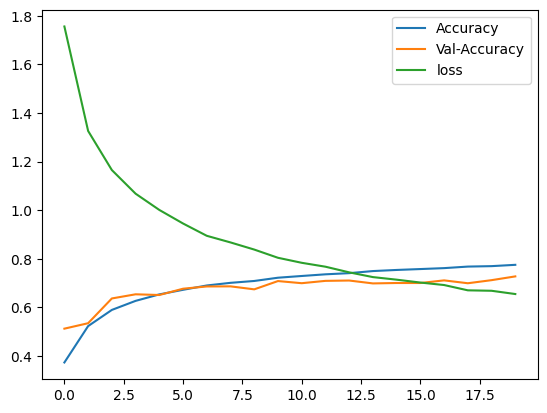

In [ ]:
plt.plot(modelrun.history["accuracy"],label = "Accuracy")
plt.plot(modelrun.history["val_accuracy"],label = "Val-Accuracy")
plt.plot(modelrun.history["loss"],label = "loss")
plt.legend()

In [ ]:
# save the model
myModel.save("cnn_model.h5")

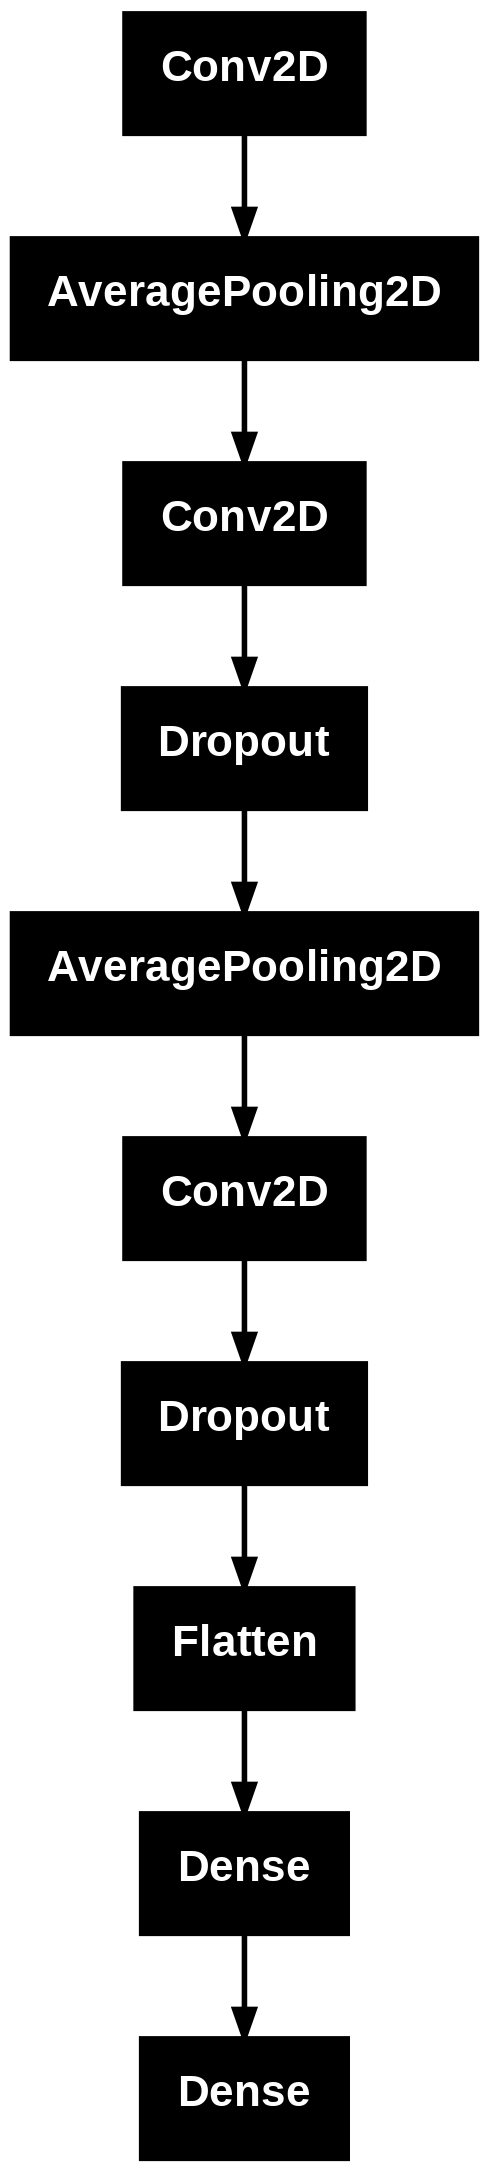

In [ ]:
tf.keras.utils.plot_model(myModel)